# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import re
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm #minimos cuadrados
from statsmodels.formula.api import ols

    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('/content/drive/MyDrive/Data_sets/fifa.csv')

Let's examine the dataset by looking at the `head`.

In [16]:
# Your code here:
fifa.columns = fifa.columns.str.strip().str.lower().str.replace(' ', '_')
fifa.head(5)

,name,age,nationality,overall,potential,club,value,preferred_foot,position,weak_foot,...,sprintspeed,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,valuenumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [19]:
# Your code here:
def clean_value(row):
    if 'M' in row:
        return float(re.sub('[^0-9,.]', '', row))
    else:
        return float(re.sub('[^0-9]', '', row))/1000


fifa['ValueNumeric'] = fifa['value'].apply(clean_value)

fifa[['value', 'ValueNumeric']].head(5)




,value,ValueNumeric
0,€110.5M,110.5
1,€77M,77.0
2,€118.5M,118.5
3,€72M,72.0
4,€102M,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [11]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [20]:
# Your code here:

formula = 'ValueNumeric ~ C(position) + C(preferred_foot)'
model = ols(formula= formula, data= fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table




,sum_sq,df,F,PR(>F)
C(position),16570.015128,26.0,20.885022,1.634952e-96
C(preferred_foot),234.162243,1.0,7.673655,5.608990e-03
Residual,552902.860021,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

CONCLUSION. Se rechaza nuestra hipotesis nula de que la posicion influye en el pie preferido. 

---

  

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [21]:
# Your code here:

formula = 'ValueNumeric ~C(fifa["nationality"])'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, type=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""nationality""])",163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

Se acepta la hipotesis alternativa cual es que la nacionalidad no influye en el valor de cada jugador. 

---



# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [27]:
fifa = fifa.dropna()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17918 non-null  object 
 1   age             17918 non-null  int64  
 2   nationality     17918 non-null  object 
 3   overall         17918 non-null  int64  
 4   potential       17918 non-null  int64  
 5   club            17918 non-null  object 
 6   value           17918 non-null  object 
 7   preferred_foot  17918 non-null  object 
 8   position        17918 non-null  object 
 9   weak_foot       17918 non-null  float64
 10  acceleration    17918 non-null  float64
 11  sprintspeed     17918 non-null  float64
 12  stamina         17918 non-null  float64
 13  strength        17918 non-null  float64
 14  longshots       17918 non-null  float64
 15  aggression      17918 non-null  float64
 16  interceptions   17918 non-null  float64
 17  positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [32]:
# Your code here:
x = sm.add_constant(fifa[['stamina', 'sprintspeed']])

y = fifa['ValueNumeric']

#x.head(5) 
#y.head(5)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [33]:
# Your conclusions here:
model = sm.OLS(y,x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Mon, 16 May 2022   Prob (F-statistic):          8.04e-193
Time:                        07:06:10   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [37]:
# Your code here:
x = sm.add_constant(fifa['potential'])
y = fifa['ValueNumeric']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [38]:
# Your conclusions here:
model = sm.OLS(y,x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        07:09:10   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

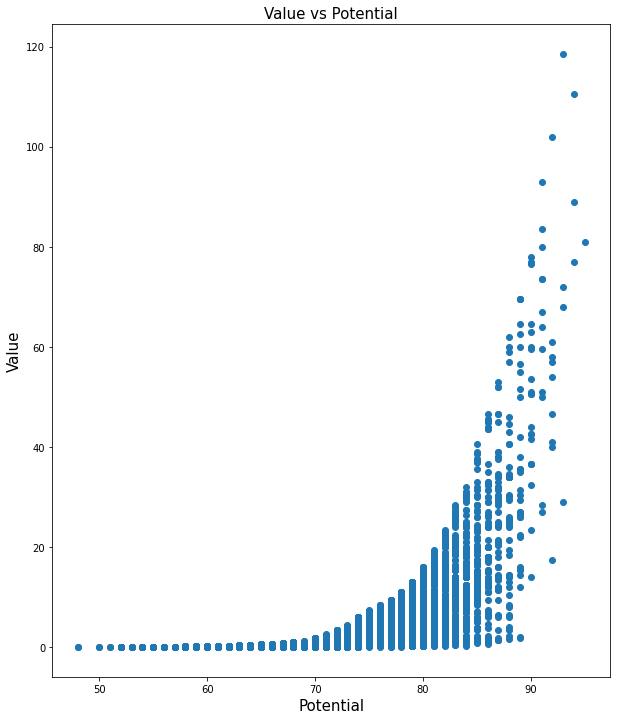

In [39]:
# Your code here:
plt.figure(figsize=(10,12))
plt.title('Value vs Potential', fontsize=15)
plt.xlabel('Potential', fontsize=15);
plt.ylabel('Value', fontsize=15);

plt.scatter(fifa['potential'], fifa['ValueNumeric'])


No es observable a simple vista una regresion lineal, además de que la tabla indica que no hay regresion lineal, parece exponencial.

---

